## Birtday Paradox

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

### Problem 1a.

During exercise session, we showed that for $d$ equally likely dates in a year and $n$ people, the probability of a repeat date is $p(n)=1-\frac{d^\underline{n}}{d^n}$. We also derived a simple approximate formula for this probability: $p_a(n) = 1-e^{-\frac{n(n-1)}{2d}}$. In particular, this approximation implies that for $d=365$ dates, $p(n)$ is close to $\frac{1}{2}$ for $n=23$.

Verify how good the approximation is. To this end, write a program that computes the exact value of $p(n)$ as well as the value of the approximation $p_a(n)$ for $d=365$ and $n=1,\ldots,60$. Plot the graphs of the two functions.

In [3]:
def approxProb(n):
    return 1.0 - np.exp(-n*(n-1)/730.0)

In [4]:
n = np.arange(1, 61)

In [5]:
y = [approxProb(i) for i in n]

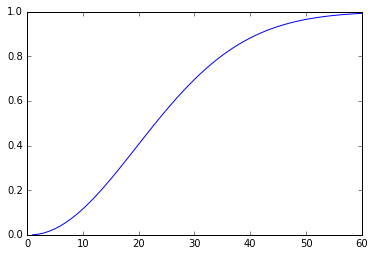

In [6]:
plt.plot(n, y)

In [7]:
def helper(d, n):
    i = 1
    d_ = d
    result = d/d_
    while i < n:
        d -= 1
        result *= d/d_
        i += 1
    return result

In [8]:
def prob(d, n):
    return 1 - (helper(d, n))

In [9]:
d = 365

In [10]:
z = [prob(d, i) for i in n]

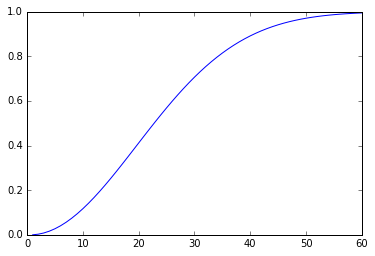

In [11]:
plt.plot(n, z)

### Problem 1b.

Implement a function, that chooses random dates out of $1,\ldots,d$ until a repeat occurs. The function should return the number of the step in which that happened. Run the function $N=100\,000$ times.

In [12]:
from random import randint

In [13]:
def randomDates(d):
    step = 0
    occ = [0] * d
    while True:
        step += 1
        rand = randint(1, d)
        if (occ[rand -1]) == 1:
            return step
        else :
            occ[rand-1] += 1
        

In [14]:
res = []
d = 365
for i in range(100000):
    x = randomDates(d)
    res.append(x)

* Plot a histogram of the return values.

(array([  1.17140000e+04,   2.63920000e+04,   2.46330000e+04,
          2.05760000e+04,   1.00240000e+04,   4.77800000e+03,
          1.45600000e+03,   3.47000000e+02,   7.00000000e+01,
          1.00000000e+01]),
 array([  2. ,  10.6,  19.2,  27.8,  36.4,  45. ,  53.6,  62.2,  70.8,
         79.4,  88. ]),
 <a list of 10 Patch objects>)

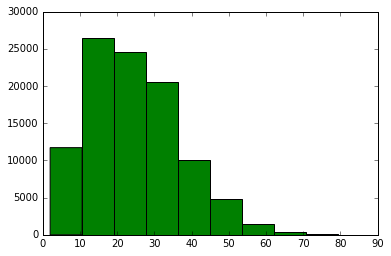

In [15]:
plt.hist(res, color='g')

* Which return value seems most likely? 

In [16]:
from collections import Counter
Counter(res).most_common(1)[0][0]

21

In [17]:
average = sum(res) / float(len(res))

* What is the average of the return values?

In [18]:
average

24.59555

* Is there any simple relation between these two numbers and the value $23$ in the previous problem?
* Is there any simple relation between the histogram obtained, and the plot in the previous problem?

### Problem 1c.

Here we investigate how our analysis using the classical approach compares to a more empirical one. The file us_births_69_88.csv contains the counts for birthdates from 1969 to 1988. Only those births, for which the full date is known, are included in the file.

* Read the file.

In [19]:
d = pd.DataFrame(columns = range(1,13))
data = pd.read_csv('rpis/lab1/us_births_69_88.csv')

* Investigate the data. Do you notice anything strange?

In [20]:
data

,month,day,births
0,1,1,160369
1,1,2,169896
2,1,3,180036
3,1,4,182854
4,1,5,184145
5,1,6,186726
6,1,7,188277
7,1,8,185186
8,1,9,181511
9,1,10,183668


In [21]:
for m in range(1, 13):
    col = []
    for i in range(data.shape[0]):
        if(data['month'][i] == m):
            col.append(data['births'][i])
    d[m] = col   

* Plot a heatmap of the data. Do you notice any significant deviations from the uniform assumption? Can you explain them?

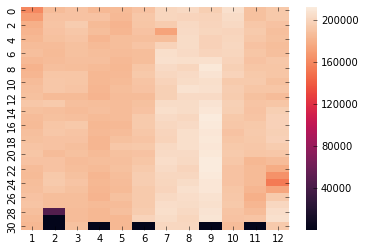

In [22]:
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(d)
plt.show()

* Implement a sampling function as in 1b, but this time using the supplied data. Compare the results.

In [23]:
data = pd.read_csv('rpis/lab1/us_births_69_88.csv')
d = data.shape[0]
days = range(1, d+1)

In [24]:
all_births = 0
for i in range(data.shape[0]):
    all_births += data['births'][i]

In [25]:
freq = []
for i in range(data.shape[0]):
    freq.append(data['births'][i]/all_births)

In [26]:
def randomDatesFromData(d):
    step = 0
    occ = [0] * d
    while True:
        step += 1
        rand = np.random.choice(days, p=freq)
        if (occ[rand -1]) == 1:
            return step
        else:
            occ[rand-1] += 1    

In [28]:
res_ = []
for i in range(100000):
    x = randomDatesFromData(d)
    res_.append(x)

(array([  1.41370000e+04,   2.70000000e+04,   2.93830000e+04,
          1.72240000e+04,   8.92500000e+03,   2.50800000e+03,
          7.12000000e+02,   1.01000000e+02,   8.00000000e+00,
          2.00000000e+00]),
 array([  2. ,  11.5,  21. ,  30.5,  40. ,  49.5,  59. ,  68.5,  78. ,
         87.5,  97. ]),
 <a list of 10 Patch objects>)

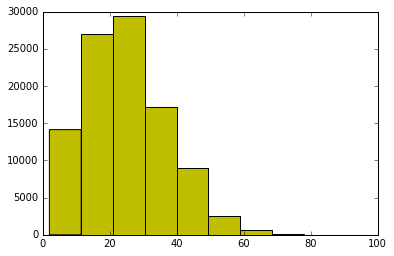

In [29]:
plt.hist(res_, color='y')

In [30]:
Counter(res_).most_common(1)[0][0]

21